# 데이터 전처리

## 데이터 전처리 이해

### 데이터 전처리 방법

- 데이터 타입의 일관성

In [1]:
import pandas as pd

In [23]:
d = pd.DataFrame({'date': ['2023-01-03', '2021-11-22', '2019-01-05'],
                 'name': ['J', 'Y', 'O']})
d

,date,name
0,2023-01-03,J
1,2021-11-22,Y
2,2019-01-05,O


In [24]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [25]:
d.date = pd.to_datetime(d.date)
d

,date,name
0,2023-01-03,J
1,2021-11-22,Y
2,2019-01-05,O


In [26]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


---

- 결측값 제거 또는 대체

In [2]:
import numpy as np

In [13]:
df = pd.DataFrame(np.random.randn(8, 3), 
                  columns = ['C1', 'C2', 'C3'])
df

,C1,C2,C3
0,-0.255181,0.297480,2.094750
1,-1.094050,1.396612,1.246451
2,0.812151,-0.117541,-1.573837
3,0.520417,-0.158182,1.018996
4,1.316094,-0.225698,-0.712416
5,1.768504,0.413169,-2.674087
6,0.603179,-1.172193,-0.200173
7,0.914581,-0.107945,1.005223


In [14]:
df.loc[2, 'C2'] = np.nan
df.loc[3, 'C2'] = np.nan
df

,C1,C2,C3
0,-0.255181,0.297480,2.094750
1,-1.094050,1.396612,1.246451
2,0.812151,NaN,-1.573837
3,0.520417,NaN,1.018996
4,1.316094,-0.225698,-0.712416
5,1.768504,0.413169,-2.674087
6,0.603179,-1.172193,-0.200173
7,0.914581,-0.107945,1.005223


In [20]:
#0으로 대체
df = df.fillna(0) 
df

,C1,C2,C3
0,-0.255181,0.297480,2.094750
1,-1.094050,1.396612,1.246451
2,0.812151,0.000000,-1.573837
3,0.520417,0.000000,1.018996
4,1.316094,-0.225698,-0.712416
5,1.768504,0.413169,-2.674087
6,0.603179,-1.172193,-0.200173
7,0.914581,-0.107945,1.005223


---

In [21]:
df.loc[2, 'C2'] = np.nan
df.loc[3, 'C2'] = np.nan
df

,C1,C2,C3
0,-0.255181,0.297480,2.094750
1,-1.094050,1.396612,1.246451
2,0.812151,NaN,-1.573837
3,0.520417,NaN,1.018996
4,1.316094,-0.225698,-0.712416
5,1.768504,0.413169,-2.674087
6,0.603179,-1.172193,-0.200173
7,0.914581,-0.107945,1.005223


In [22]:
#평균값 대체
df = df.fillna(df.mean()) 
df

,C1,C2,C3
0,-0.255181,0.297480,2.094750
1,-1.094050,1.396612,1.246451
2,0.812151,0.100238,-1.573837
3,0.520417,0.100238,1.018996
4,1.316094,-0.225698,-0.712416
5,1.768504,0.413169,-2.674087
6,0.603179,-1.172193,-0.200173
7,0.914581,-0.107945,1.005223


---

In [27]:
df['location'] = ['서울', '서울', '경기', '인천', '강원',
                  '경기', '서울', '경기']
df

,C1,C2,C3,location
0,-0.255181,0.297480,2.094750,서울
1,-1.094050,1.396612,1.246451,서울
2,0.812151,0.100238,-1.573837,경기
3,0.520417,0.100238,1.018996,인천
4,1.316094,-0.225698,-0.712416,강원
5,1.768504,0.413169,-2.674087,경기
6,0.603179,-1.172193,-0.200173,서울
7,0.914581,-0.107945,1.005223,경기


In [29]:
df.loc[3, 'location'] = np.nan
df.loc[7, 'location'] = np.nan
df

,C1,C2,C3,location
0,-0.255181,0.297480,2.094750,서울
1,-1.094050,1.396612,1.246451,서울
2,0.812151,0.100238,-1.573837,경기
3,0.520417,0.100238,1.018996,NaN
4,1.316094,-0.225698,-0.712416,강원
5,1.768504,0.413169,-2.674087,경기
6,0.603179,-1.172193,-0.200173,서울
7,0.914581,-0.107945,1.005223,NaN


In [30]:
df.location.value_counts() #최빈값

서울    3
경기    2
강원    1
Name: location, dtype: int64

In [31]:
df.location.mode() #또 다른 최빈값

0    서울
dtype: object

In [32]:
df.location.mode()[0]

'서울'

In [33]:
df.location.value_counts().index[0]

'서울'

In [34]:
#최빈값 대체
df.location = df.location.fillna(df.location.mode()[0])
df

,C1,C2,C3,location
0,-0.255181,0.297480,2.094750,서울
1,-1.094050,1.396612,1.246451,서울
2,0.812151,0.100238,-1.573837,경기
3,0.520417,0.100238,1.018996,서울
4,1.316094,-0.225698,-0.712416,강원
5,1.768504,0.413169,-2.674087,경기
6,0.603179,-1.172193,-0.200173,서울
7,0.914581,-0.107945,1.005223,서울


---

- 동일한 칼럼값 대체

In [36]:
a = ['A', 'B', 'A', 'C', 'C', 'A', 'B', 'A', 'D', 'A', 'D']
a = pd.Series(a)
a

0     A
1     B
2     A
3     C
4     C
5     A
6     B
7     A
8     D
9     A
10    D
dtype: object

In [37]:
a_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

In [38]:
b = a.map(a_dict)

In [39]:
pd.DataFrame({'변환전': a, '변환후': b})

,변환전,변환후
0,A,1
1,B,2
2,A,1
3,C,3
4,C,3
5,A,1
6,B,2
7,A,1
8,D,4
9,A,1


---

- 이상치

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df #위에서 사용한 데이터프레임

,C1,C2,C3,location
0,-0.255181,0.297480,2.094750,서울
1,-1.094050,1.396612,1.246451,서울
2,0.812151,0.100238,-1.573837,경기
3,0.520417,0.100238,1.018996,서울
4,1.316094,-0.225698,-0.712416,강원
5,1.768504,0.413169,-2.674087,경기
6,0.603179,-1.172193,-0.200173,서울
7,0.914581,-0.107945,1.005223,서울


In [42]:
df.loc[1, 'C1'] = 11
df.loc[3, 'C3'] = -10

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd41534c070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd41534c760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4153d8cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd41534ce20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd415359160>,
 'means': []}

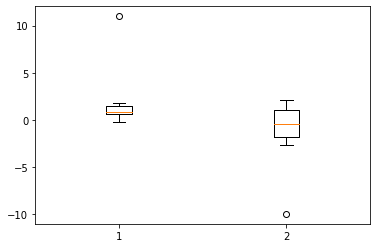

In [44]:
plt.boxplot([df['C1'], df['C3']])

---

- 목적에 맞는 변수 추출

<AxesSubplot:>

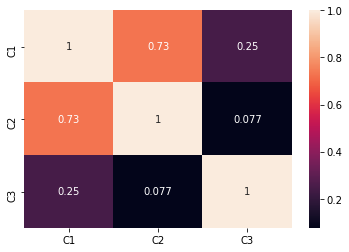

In [45]:
sns.heatmap(df.corr(), annot=True)

---

## 데이터 전처리 실습

[데이터](https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download)

### 데이터 읽기와 확인

In [123]:
med = pd.read_csv('medical.csv')
med

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [124]:
med.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

- Hipertension, Handcap 정확한 칼럼명으로 변환

In [125]:
med.rename(columns = {'Hipertension': 'Hypertension',
          'Handcap': 'Handicap'},
          inplace = True)
med.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [126]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 결손값 확인하기

In [127]:
med.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

### 통계량 확인하기

In [128]:
med.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


나이에 -1이 존재함\
핸디캡은 0과 1로 기록되어야함\
=> 논리적 오류인 데이터를 이상치로 판별하여 제거

In [129]:
med = med[med.Age >= 0]
med.Age.min()

0

In [130]:
med = med[(med.Handicap == 0) | (med.Handicap == 1)]
med.Handicap.value_counts()

0    108285
1      2042
Name: Handicap, dtype: int64

### 데이터 타입 변환

In [131]:
med['No-show'].value_counts()

No     88049
Yes    22278
Name: No-show, dtype: int64

In [132]:
med['No-show'] = med['No-show'].map({'Yes': 1, 'No': 0})

In [133]:
med.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,0.201927
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.401440
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
med['AppointmentDay'] = pd.to_datetime(med['AppointmentDay'])
med['ScheduledDay'] = pd.to_datetime(med['ScheduledDay'])
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110327 non-null  float64            
 1   AppointmentID   110327 non-null  int64              
 2   Gender          110327 non-null  object             
 3   ScheduledDay    110327 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110327 non-null  datetime64[ns, UTC]
 5   Age             110327 non-null  int64              
 6   Neighbourhood   110327 non-null  object             
 7   Scholarship     110327 non-null  int64              
 8   Hypertension    110327 non-null  int64              
 9   Diabetes        110327 non-null  int64              
 10  Alcoholism      110327 non-null  int64              
 11  Handicap        110327 non-null  int64              
 12  SMS_received    110327 non-null  int64              
 13  No-show       

In [135]:
med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### 새로운 변수 추가

In [136]:
med['Waiting_day'] = med['AppointmentDay'].dt.dayofyear - med['ScheduledDay'].dt.dayofyear

In [137]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110327 non-null  float64            
 1   AppointmentID   110327 non-null  int64              
 2   Gender          110327 non-null  object             
 3   ScheduledDay    110327 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110327 non-null  datetime64[ns, UTC]
 5   Age             110327 non-null  int64              
 6   Neighbourhood   110327 non-null  object             
 7   Scholarship     110327 non-null  int64              
 8   Hypertension    110327 non-null  int64              
 9   Diabetes        110327 non-null  int64              
 10  Alcoholism      110327 non-null  int64              
 11  Handicap        110327 non-null  int64              
 12  SMS_received    110327 non-null  int64              
 13  No-show       

In [138]:
med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


### 값 확인

In [139]:
med.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_day
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,0.201927,9.981854
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.401440,15.610923
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-223.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,146.000000


In [140]:
med = med[med.Waiting_day >= 0]
med.Waiting_day.min()

0

In [141]:
med.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  86,
        91,  98,  92,  94,  96,  93,  95,  97, 102, 115, 100,  99])

<AxesSubplot:xlabel='Age'>

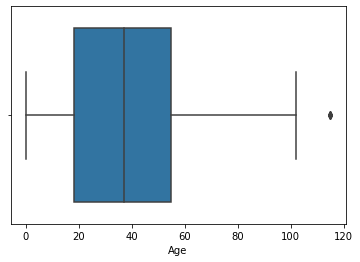

In [142]:
sns.boxplot(x = med.Age)

<AxesSubplot:xlabel='Age'>

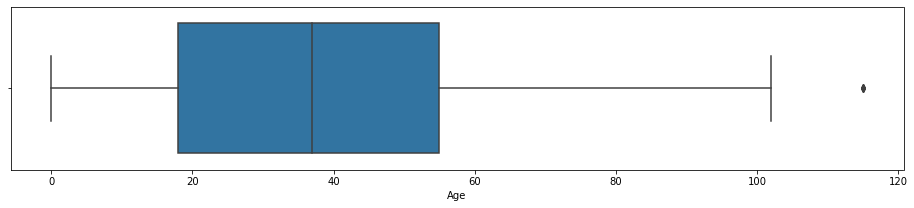

In [143]:
plt.figure(figsize=(16, 3))
sns.boxplot(x = med.Age)

In [144]:
q1 = np.percentile(med.Age, 25)
q3 = np.percentile(med.Age, 75)
print(q1, q3)

18.0 55.0


In [145]:
iqr = q3 - q1

In [146]:
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)
print(lower_bound, upper_bound)

-37.5 110.5


In [147]:
med = med[med.Age <= upper_bound] #이상치 제거

<AxesSubplot:xlabel='Age'>

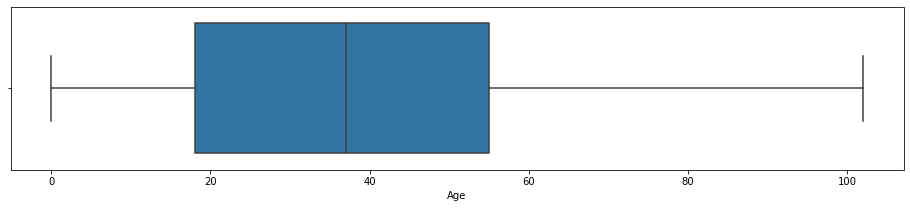

In [148]:
plt.figure(figsize=(16, 3))
sns.boxplot(x = med.Age)

### 목적에 적합한 변수 추출

In [152]:
waiting_day_0 = med[med.Waiting_day == 0]['Waiting_day'].value_counts()
waiting_day_0_noshow = med[(med['Waiting_day'] == 0) & (med['No-show'] == 1)]['Waiting_day'].value_counts()
waiting_day_0_noshow / waiting_day_0

0    0.046461
Name: Waiting_day, dtype: float64

In [153]:
no_show = med[med['No-show'] == 1]
show = med[med['No-show'] == 0]

### 특성 파악

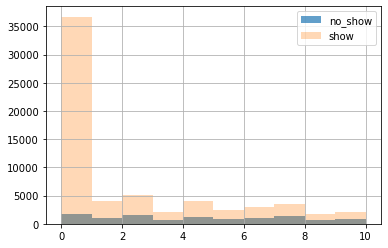

In [154]:
no_show[no_show['Waiting_day'] <= 10]['Waiting_day'].hist(alpha=0.7, label = 'no_show')
show[show['Waiting_day'] <= 10]['Waiting_day'].hist(alpha=0.3, label = 'show')
plt.legend()

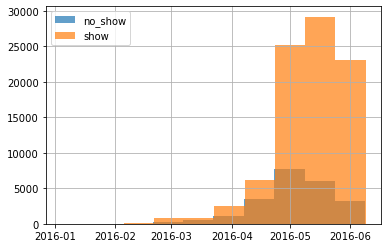

In [155]:
no_show['ScheduledDay'].hist(alpha=0.7, label = 'no_show')
show['ScheduledDay'].hist(alpha=0.7, label = 'show')
plt.legend()

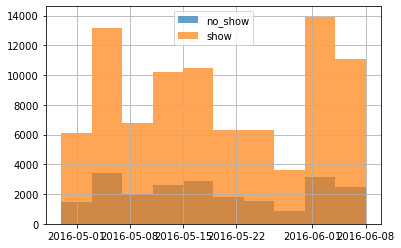

In [157]:
no_show['AppointmentDay'].hist(alpha=0.7, label = 'no_show')
show['AppointmentDay'].hist(alpha=0.7, label = 'show')
plt.legend()

- 재방문한 사람중에 노쇼여부

In [158]:
med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [161]:
med.PatientId.value_counts().iloc[0:20] #상위 20명

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
6.543360e+13    46
1.447997e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
Name: PatientId, dtype: int64

In [162]:
med.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_day
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,35
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,35
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,41
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,41
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,0,41


- 웨이팅 기간에 따른 노쇼 여부

In [165]:
med[(med['Waiting_day'] >= 50) & (med['No-show'] == 1)].PatientId.value_counts().iloc[:10]

3.384931e+14    6
5.443247e+12    3
4.176940e+12    3
2.145389e+13    3
1.545897e+11    3
5.673322e+12    3
5.784134e+11    2
4.716489e+13    2
1.965364e+13    2
7.278230e+14    2
Name: PatientId, dtype: int64

- 메세지와 웨이팅기간에 따라 노쇼여부

<AxesSubplot:xlabel='SMS_received', ylabel='Waiting_day'>

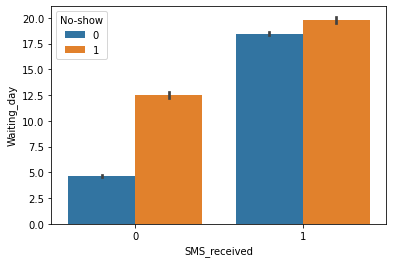

In [166]:
sns.barplot(x='SMS_received', y='Waiting_day', hue='No-show', data=med)

<AxesSubplot:>

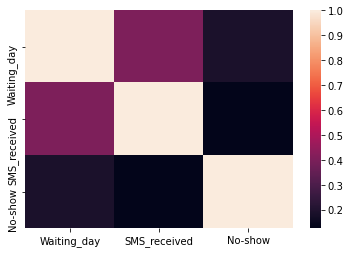

In [167]:
med_corr3 = med[['Waiting_day', 'SMS_received', 'No-show']].corr()
sns.heatmap(med_corr3)

알람메세지를 받는다고 할지라도 웨이팅기간이 길어질수록 노쇼가 많이 발생한다. 등등

<AxesSubplot:xlabel='No-show', ylabel='count'>

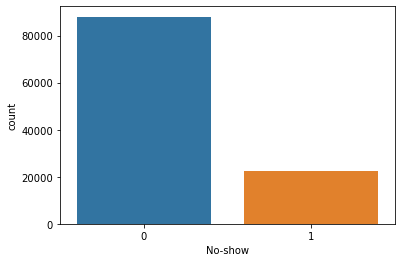

In [168]:
sns.countplot(x='No-show', data=med)

<AxesSubplot:xlabel='Gender', ylabel='count'>

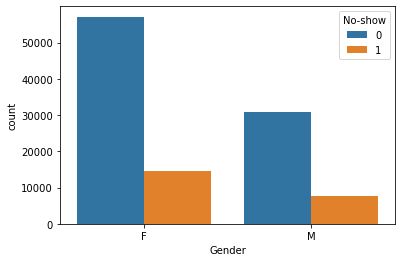

In [170]:
sns.countplot(x='Gender', hue='No-show', data=med)

In [177]:
female_cnt = med[(med['Gender'] == 'F') & (med['No-show'] == 1)]['Gender'].value_counts()
male_cnt = med[(med['Gender'] == 'M') & (med['No-show'] == 1)]['Gender'].value_counts()
total_female_cnt = med[med['Gender'] == 'F']['Gender'].value_counts()
total_male_cnt = med[med['Gender'] == 'M']['Gender'].value_counts()

In [178]:
print(female_cnt / total_female_cnt)
print(male_cnt / total_male_cnt)

F    0.203008
Name: Gender, dtype: float64
M    0.199596
Name: Gender, dtype: float64


1    19675
Name: No-show, dtype: int64 1    2576
Name: No-show, dtype: int64


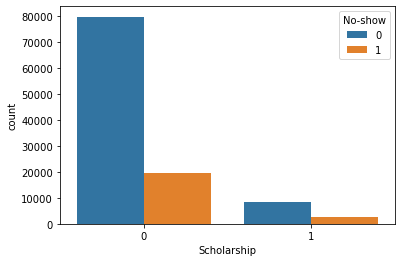

In [187]:
sns.countplot(x='Scholarship', hue='No-show', data=med)
a = no_show[no_show['Scholarship'] == 0]['No-show'].value_counts()
b = no_show[no_show['Scholarship'] == 1]['No-show'].value_counts()
print(a, b)

<AxesSubplot:xlabel='Alcoholism', ylabel='count'>

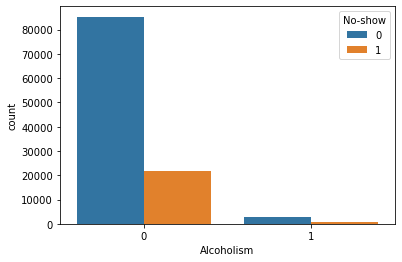

In [182]:
sns.countplot(x='Alcoholism', hue='No-show', data=med)

In [188]:
a = no_show[no_show['Alcoholism'] == 0]['No-show'].value_counts()
b = no_show[no_show['Alcoholism'] == 1]['No-show'].value_counts()
print(a, b)

1    21576
Name: No-show, dtype: int64 1    675
Name: No-show, dtype: int64


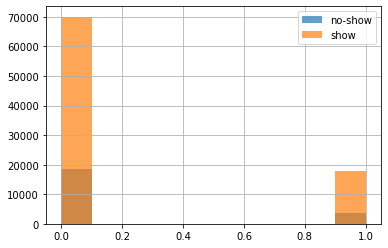

In [185]:
no_show['Hypertension'].hist(alpha=0.7, label='no-show')
show['Hypertension'].hist(alpha=0.7, label='show')
plt.legend()

<AxesSubplot:xlabel='Handicap', ylabel='count'>

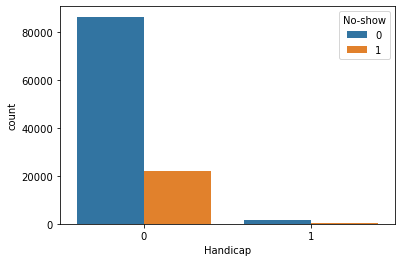

In [189]:
sns.countplot(x='Handicap', hue='No-show', data=med)

---

## 시계열 데이터 전처리

### 시계열 데이터 패턴

1. 추세(Trend) : 데이터가 장기적으로 증가하거나 감소할 때, 추세(trend)가 존재(꼭 선형이 아니여도 됨)
2. 주기성(Cycle) : 고정된 빈도가 아닌 형태로 증가나 감소하는 모습을 보일 때 주기(cycle)가 나타남
3. 계절성(Seasonality) : 해마다 어떤 특정한 때나 1주일마다 특정 요일에 나타나는 것 같은 계절성 요인이 시계열에 영향을 줄 때 계절성(seasonality) 패턴이 나타남
4. 불규칙성(lrregular)

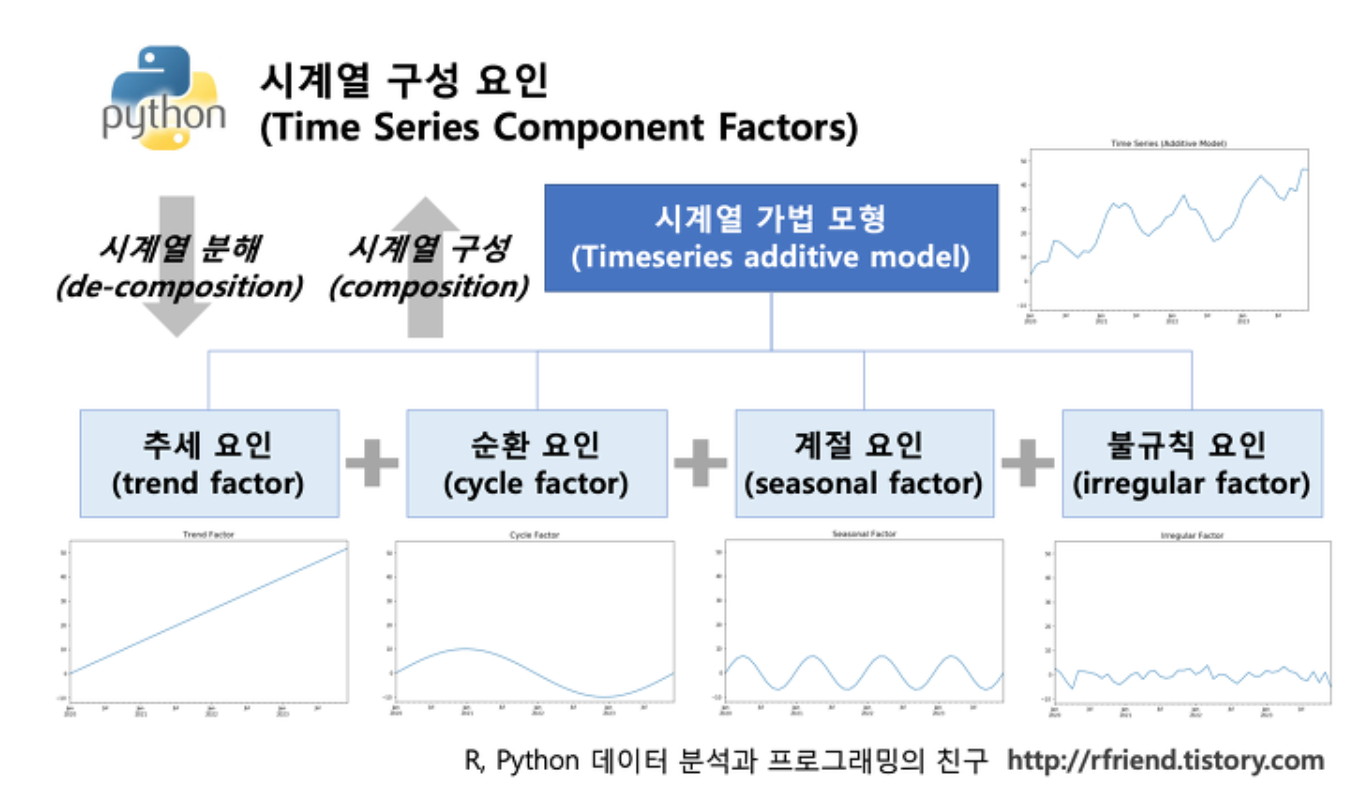

### 시계열 데이터 분석

(설명 - 4시 15분 다시보기)
1. AR모형 : 선형관계 측정, 이전값이 다음값에 영향이 준다
2. MA모형 : 과거의 예측오차로 미래를 예측
3. ARMA모형 : AR + MA 혼합하여 현재 상태를 예측(불규칙한 시계열 데이터에 대해서는 예측을 할 수 없음)
4. ARIMA(AutoRegressive Integrated Moving Average) : ARMA에서 Integrated 개념을 추가\
관측값 사이에 차분을 사용해서 불규칙한 시계열 데이터를 규칙적인 시계열 데이터로 활용할 수 있도록 하는 모형\
현재와 추세간의 관계를 활용해서 미래를 예측할 수 있는 모형이다.

    (차분 : 현재상태 변수에서 바로 이전상태의 변수를 빼주는 것)

### 시계열 데이터 전처리 방법

1) [datetime 변환](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)


In [191]:
d = pd.DataFrame({'date': ['2023-01-03', '2021-11-22', '2019-01-05'],
                 'name': ['J', 'Y', 'O']})
d

,date,name
0,2023-01-03,J
1,2021-11-22,Y
2,2019-01-05,O


In [192]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [197]:
d['date'] = pd.to_datetime(d.date, format='%Y-%m-%d') #format = : 위의 링크에서 참고
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


In [198]:
d.head()

,date,name
0,2023-01-03,J
1,2021-11-22,Y
2,2019-01-05,O


---

2) datetime형의 칼럼을 인덱스로 설정

In [200]:
d.set_index('date')

,name
date,
2023-01-03,J
2021-11-22,Y
2019-01-05,O


In [201]:
d

,date,name
0,2023-01-03,J
1,2021-11-22,Y
2,2019-01-05,O


In [202]:
d.set_index('date', inplace=True)
d

,name
date,
2023-01-03,J
2021-11-22,Y
2019-01-05,O


In [203]:
d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2023-01-03 to 2019-01-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
dtypes: object(1)
memory usage: 48.0+ bytes


---

3) 결측치

In [205]:
d = pd.DataFrame({'date': ['2019-01-03', '2021-11-22',
                          '2021-12-01', '2023-01-05'],
                 'x1': [0.1, 2.0, np.nan, 1.2]})
d['date'] = pd.to_datetime(d.date)
d.set_index('date', inplace=True)

In [206]:
d

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-01,NaN
2023-01-05,1.2


In [207]:
d.isnull().sum()

x1    1
dtype: int64

In [208]:
d.isnull().sum().sum()

1

In [212]:
d.fillna(method='ffill') #전의 값으로 대체

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-01,2.0
2023-01-05,1.2


In [213]:
d.fillna(method='pad') #전의 값으로 대체

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-01,2.0
2023-01-05,1.2


In [214]:
d.interpolate() #앞뒤 평균값

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-01,1.6
2023-01-05,1.2


---

4) 빈도설정

In [215]:
d.index #freq=None : 빈도가 설정 X

DatetimeIndex(['2019-01-03', '2021-11-22', '2021-12-01', '2023-01-05'], dtype='datetime64[ns]', name='date', freq=None)

In [216]:
d2 = d.asfreq('Y', method='ffill') #'Y' : 마지막 일
d2

,x1
date,
2019-12-31,0.1
2020-12-31,0.1
2021-12-31,NaN
2022-12-31,NaN


In [ ]:
d

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-01,NaN
2023-01-05,1.2


> asfreq( ) 옵션

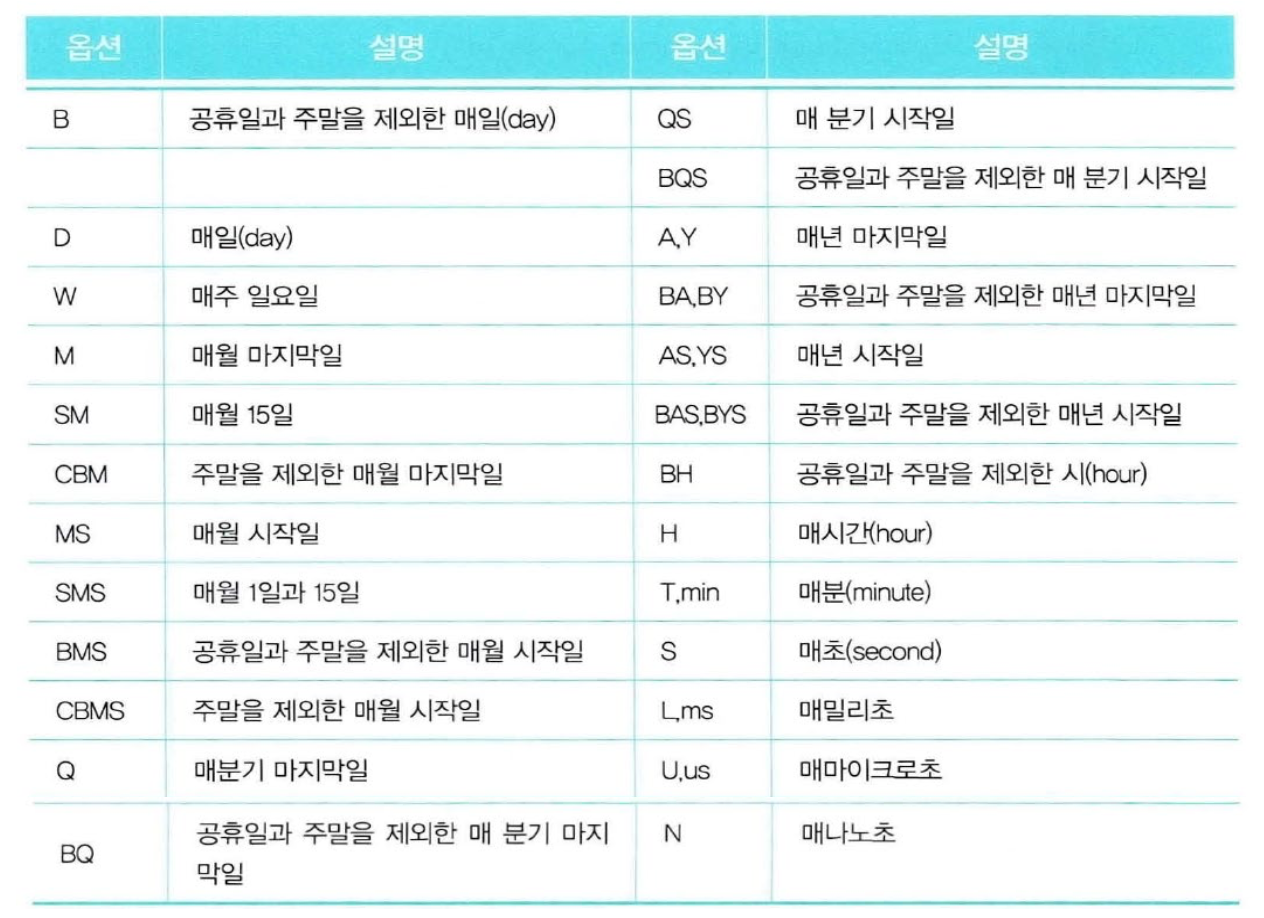

In [219]:
d2.index #freq='A-DEC' : 매년 마지막 일

DatetimeIndex(['2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31'], dtype='datetime64[ns]', name='date', freq='A-DEC')

In [220]:
d.asfreq('W') #freq='W' : 매주 일요일

,x1
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,NaN
2019-02-03,NaN
...,...
2022-12-04,NaN
2022-12-11,NaN
2022-12-18,NaN


In [221]:
d.asfreq('M') #freq='M' : 매월 마지막 일

,x1
date,
2019-01-31,NaN
2019-02-28,NaN
2019-03-31,NaN
2019-04-30,NaN
2019-05-31,NaN
2019-06-30,NaN
2019-07-31,NaN
2019-08-31,NaN
2019-09-30,NaN


---

5) 특징량 만들기

In [4]:
d = pd.DataFrame({'date': ['2021-01-06', '2021-01-13',
                          '2021-01-20', '2021-01-27', '2021-02-03'],
                 'x1': [5, 4, 3, 2, 7]})
d.date = pd.to_datetime(d.date)
d.set_index(keys=['date'], inplace=True)
d

,x1
date,
2021-01-06,5
2021-01-13,4
2021-01-20,3
2021-01-27,2
2021-02-03,7


In [ ]:
d

,x1
date,
2021-01-06,5
2021-01-13,4
2021-01-20,3
2021-01-27,2
2021-02-03,7


In [5]:
tmp = d.rolling(1).mean()
tmp

,x1
date,
2021-01-06,5.0
2021-01-13,4.0
2021-01-20,3.0
2021-01-27,2.0
2021-02-03,7.0


In [6]:
tmp2 = d.rolling(2).mean()
tmp2

,x1
date,
2021-01-06,NaN
2021-01-13,4.5
2021-01-20,3.5
2021-01-27,2.5
2021-02-03,4.5


---

6) 이전 값과 차이 계산

In [7]:
d

,x1
date,
2021-01-06,5
2021-01-13,4
2021-01-20,3
2021-01-27,2
2021-02-03,7


In [8]:
y_diff = d.diff() #변동량
y_diff

,x1
date,
2021-01-06,NaN
2021-01-13,-1.0
2021-01-20,-1.0
2021-01-27,-1.0
2021-02-03,5.0


In [9]:
y_diff.columns = ['diff']
y_diff

,diff
date,
2021-01-06,NaN
2021-01-13,-1.0
2021-01-20,-1.0
2021-01-27,-1.0
2021-02-03,5.0


In [10]:
pd.concat([d, y_diff], axis = 1) #concat : 병합(똑같은 갯수 일때)

,x1,diff
date,,
2021-01-06,5,NaN
2021-01-13,4,-1.0
2021-01-20,3,-1.0
2021-01-27,2,-1.0
2021-02-03,7,5.0


---

7) 카테고리형 컬럼 생성

In [11]:
temp = pd.cut(d['x1'], 2) #cut : 구간 나누기, 2 : 구간 갯수
temp

date
2021-01-06      (4.5, 7.0]
2021-01-13    (1.995, 4.5]
2021-01-20    (1.995, 4.5]
2021-01-27    (1.995, 4.5]
2021-02-03      (4.5, 7.0]
Name: x1, dtype: category
Categories (2, interval[float64]): [(1.995, 4.5] < (4.5, 7.0]]

---

8) 자연값 추출

In [12]:
d['shift'] = d['x1'].shift(2) #밀어내기
d

,x1,shift
date,,
2021-01-06,5,NaN
2021-01-13,4,NaN
2021-01-20,3,5.0
2021-01-27,2,4.0
2021-02-03,7,3.0


In [13]:
d = d.fillna(method='bfill') #bfill : 뒤의 값으로 대체
d

,x1,shift
date,,
2021-01-06,5,5.0
2021-01-13,4,5.0
2021-01-20,3,5.0
2021-01-27,2,4.0
2021-02-03,7,3.0


---

9) 원-핫 인코딩

In [14]:
d = pd.DataFrame({'date': ['2021-01-06', '2021-01-13',
                          '2021-01-20', '2021-01-27', '2021-02-03'],
                 'x1': [5, 4, 3, 2, 7],
                 '과목': ['a', 'b', 'c', 'd', 'e']})
d.date = pd.to_datetime(d.date)
d.set_index(keys=['date'], inplace=True)
d

,x1,과목
date,,
2021-01-06,5,a
2021-01-13,4,b
2021-01-20,3,c
2021-01-27,2,d
2021-02-03,7,e


In [15]:
x = pd.get_dummies(d['과목']) #더미변수
x

,a,b,c,d,e
date,,,,,
2021-01-06,1,0,0,0,0
2021-01-13,0,1,0,0,0
2021-01-20,0,0,1,0,0
2021-01-27,0,0,0,1,0
2021-02-03,0,0,0,0,1


In [16]:
x = pd.concat([d, x], axis = 1)
x

,x1,과목,a,b,c,d,e
date,,,,,,,
2021-01-06,5,a,1,0,0,0,0
2021-01-13,4,b,0,1,0,0,0
2021-01-20,3,c,0,0,1,0,0
2021-01-27,2,d,0,0,0,1,0
2021-02-03,7,e,0,0,0,0,1


---

## 시계열 데이터 실습

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- [애플 주가 데이터](https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021)

In [12]:
ap = pd.read_csv('AAPL.csv')
ap

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,26.927500,26.952499,26.020000,26.427500,24.807627,204702000
1,2016-11-15,26.642500,26.920000,26.540001,26.777500,25.136171,129058000
2,2016-11-16,26.674999,27.557501,26.650000,27.497499,25.812037,235362000
3,2016-11-17,27.452499,27.587500,27.207500,27.487499,25.802647,110528000
4,2016-11-18,27.430000,27.635000,27.415001,27.514999,25.828463,113715600
...,...,...,...,...,...,...,...
1254,2021-11-08,151.410004,151.570007,150.160004,150.440002,150.028152,55020900
1255,2021-11-09,150.199997,151.429993,150.059998,150.809998,150.397125,56787900
1256,2021-11-10,150.020004,150.130005,147.850006,147.919998,147.515045,65187100
1257,2021-11-11,148.960007,149.429993,147.679993,147.869995,147.465179,41000000


In [13]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


---

- datetime형 변환

In [14]:
ap.Date = pd.to_datetime(ap.Date)
ap

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,26.927500,26.952499,26.020000,26.427500,24.807627,204702000
1,2016-11-15,26.642500,26.920000,26.540001,26.777500,25.136171,129058000
2,2016-11-16,26.674999,27.557501,26.650000,27.497499,25.812037,235362000
3,2016-11-17,27.452499,27.587500,27.207500,27.487499,25.802647,110528000
4,2016-11-18,27.430000,27.635000,27.415001,27.514999,25.828463,113715600
...,...,...,...,...,...,...,...
1254,2021-11-08,151.410004,151.570007,150.160004,150.440002,150.028152,55020900
1255,2021-11-09,150.199997,151.429993,150.059998,150.809998,150.397125,56787900
1256,2021-11-10,150.020004,150.130005,147.850006,147.919998,147.515045,65187100
1257,2021-11-11,148.960007,149.429993,147.679993,147.869995,147.465179,41000000


In [15]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


---

- 날짜로 인덱스 설정

In [16]:
ap = ap.set_index('Date')
ap

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,26.927500,26.952499,26.020000,26.427500,24.807627,204702000
2016-11-15,26.642500,26.920000,26.540001,26.777500,25.136171,129058000
2016-11-16,26.674999,27.557501,26.650000,27.497499,25.812037,235362000
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.802647,110528000
2016-11-18,27.430000,27.635000,27.415001,27.514999,25.828463,113715600
...,...,...,...,...,...,...
2021-11-08,151.410004,151.570007,150.160004,150.440002,150.028152,55020900
2021-11-09,150.199997,151.429993,150.059998,150.809998,150.397125,56787900
2021-11-10,150.020004,150.130005,147.850006,147.919998,147.515045,65187100


---

- 인덱스 중복 여부 확인

In [17]:
ap.index.is_unique

True

True은 중복 없음\
Flase는 중복 있음

In [18]:
ap.sort_values(by=['Date'], ascending=False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-12,148.429993,150.399994,147.479996,149.990005,149.579376,63804000
2021-11-11,148.960007,149.429993,147.679993,147.869995,147.465179,41000000
2021-11-10,150.020004,150.130005,147.850006,147.919998,147.515045,65187100
2021-11-09,150.199997,151.429993,150.059998,150.809998,150.397125,56787900
2021-11-08,151.410004,151.570007,150.160004,150.440002,150.028152,55020900


---

- 다운 샘플링

In [10]:
ap_mon = ap.resample('BM').mean() #BM : 월말(주말이 아닌 평일 중에서 각 달의 마지막 날)
ap_mon

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-30,27.476666,27.731250,27.286458,27.560833,25.871490,1.281196e+08
2016-12-30,28.498928,28.756309,28.386309,28.583929,26.831873,1.159565e+08
2017-01-31,29.773375,29.970250,29.696375,29.892500,28.060237,1.126244e+08
2017-02-28,33.308684,33.540395,33.209210,33.428552,31.473814,1.210460e+08
2017-03-31,35.090544,35.299456,34.927283,35.154457,33.142733,9.767450e+07
...,...,...,...,...,...,...
2021-07-30,144.570478,146.252383,143.538571,145.139524,144.315018,9.138262e+07
2021-08-31,147.850909,149.225909,146.865454,148.177727,147.516971,6.643376e+07
2021-09-30,149.001905,149.995239,147.220475,148.306190,147.684631,8.561120e+07


---

- 수익률 변수 추가

In [28]:
ap_mon['rtn'] = ap_mon['Close'].pct_change() #pct_change : 변동률(28.583929-27.560833)/28.583929
ap_mon

,Open,High,Low,Close,Adj Close,Volume,rtn
Date,,,,,,,
2016-11-30,27.476666,27.731250,27.286458,27.560833,25.871490,1.281196e+08,NaN
2016-12-30,28.498928,28.756309,28.386309,28.583929,26.831873,1.159565e+08,0.037121
2017-01-31,29.773375,29.970250,29.696375,29.892500,28.060237,1.126244e+08,0.045780
2017-02-28,33.308684,33.540395,33.209210,33.428552,31.473814,1.210460e+08,0.118292
2017-03-31,35.090544,35.299456,34.927283,35.154457,33.142733,9.767450e+07,0.051630
...,...,...,...,...,...,...,...
2021-07-30,144.570478,146.252383,143.538571,145.139524,144.315018,9.138262e+07,0.116813
2021-08-31,147.850909,149.225909,146.865454,148.177727,147.516971,6.643376e+07,0.020933
2021-09-30,149.001905,149.995239,147.220475,148.306190,147.684631,8.561120e+07,0.000867


---

- 주가 흐름 파악

In [29]:
ap_mon['MA'] = ap_mon['Close'].rolling(2).mean()
ap_mon

,Open,High,Low,Close,Adj Close,Volume,rtn,MA
Date,,,,,,,,
2016-11-30,27.476666,27.731250,27.286458,27.560833,25.871490,1.281196e+08,NaN,NaN
2016-12-30,28.498928,28.756309,28.386309,28.583929,26.831873,1.159565e+08,0.037121,28.072381
2017-01-31,29.773375,29.970250,29.696375,29.892500,28.060237,1.126244e+08,0.045780,29.238214
2017-02-28,33.308684,33.540395,33.209210,33.428552,31.473814,1.210460e+08,0.118292,31.660526
2017-03-31,35.090544,35.299456,34.927283,35.154457,33.142733,9.767450e+07,0.051630,34.291504
...,...,...,...,...,...,...,...,...
2021-07-30,144.570478,146.252383,143.538571,145.139524,144.315018,9.138262e+07,0.116813,137.549080
2021-08-31,147.850909,149.225909,146.865454,148.177727,147.516971,6.643376e+07,0.020933,146.658626
2021-09-30,149.001905,149.995239,147.220475,148.306190,147.684631,8.561120e+07,0.000867,148.241959


<AxesSubplot:xlabel='Date'>

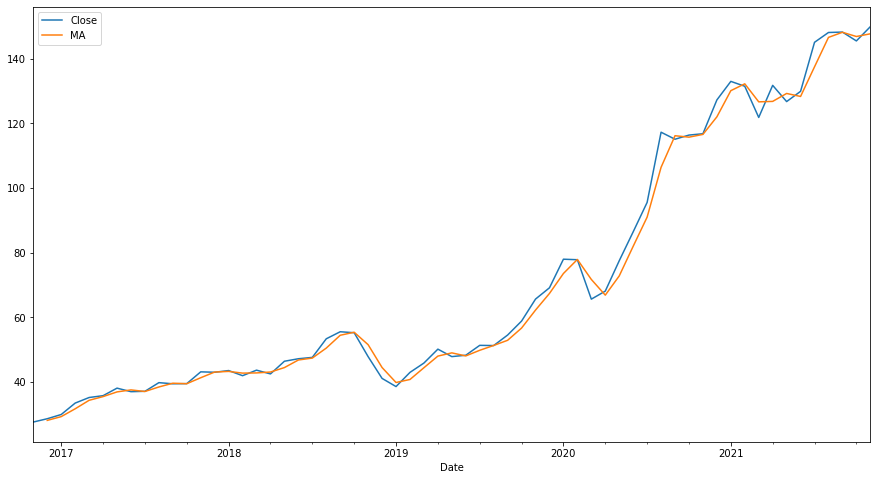

In [32]:
ap_mon.iloc[:, [3, 7]].plot(figsize=(15, 8))

Text(0.5, 1.0, 'Title')

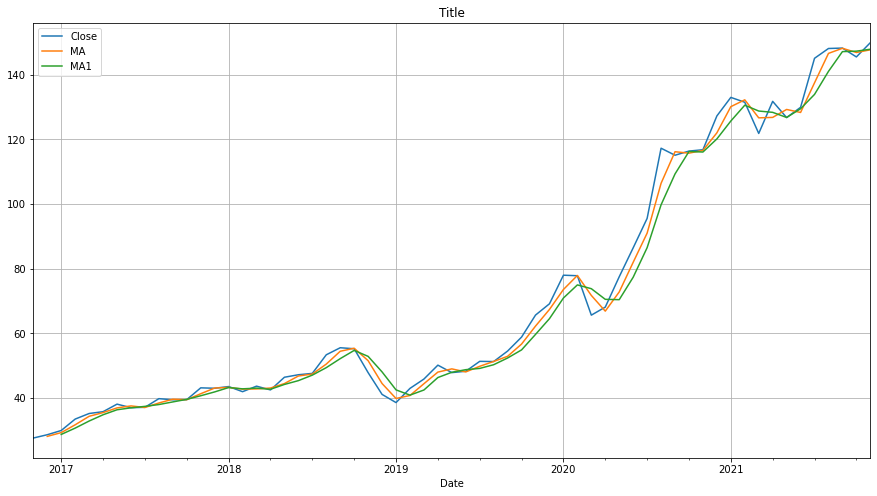

In [35]:
ap_mon['MA1'] = ap_mon['Close'].rolling(3).mean()
ap_mon.iloc[:, [3, 7, 8]].plot(figsize=(15, 8))
plt.grid()
plt.title('Title')

- 계층적 인덱스

In [36]:
ap_mon_re = ap_mon.reset_index()
ap_mon_re

,Date,Open,High,Low,Close,Adj Close,Volume,rtn,MA,MA1
0,2016-11-30,27.476666,27.731250,27.286458,27.560833,25.871490,1.281196e+08,NaN,NaN,NaN
1,2016-12-30,28.498928,28.756309,28.386309,28.583929,26.831873,1.159565e+08,0.037121,28.072381,NaN
2,2017-01-31,29.773375,29.970250,29.696375,29.892500,28.060237,1.126244e+08,0.045780,29.238214,28.679087
3,2017-02-28,33.308684,33.540395,33.209210,33.428552,31.473814,1.210460e+08,0.118292,31.660526,30.634994
4,2017-03-31,35.090544,35.299456,34.927283,35.154457,33.142733,9.767450e+07,0.051630,34.291504,32.825170
...,...,...,...,...,...,...,...,...,...,...
56,2021-07-30,144.570478,146.252383,143.538571,145.139524,144.315018,9.138262e+07,0.116813,137.549080,133.960720
57,2021-08-31,147.850909,149.225909,146.865454,148.177727,147.516971,6.643376e+07,0.020933,146.658626,141.091963
58,2021-09-30,149.001905,149.995239,147.220475,148.306190,147.684631,8.561120e+07,0.000867,148.241959,147.207814
59,2021-10-29,144.971428,146.418570,143.954761,145.563809,144.953748,7.452758e+07,-0.018491,146.934999,147.349242


In [39]:
ap_mon_re['month'] = ap_mon_re.Date.dt.month
ap_mon_re

,Date,Open,High,Low,Close,Adj Close,Volume,rtn,MA,MA1,month
0,2016-11-30,27.476666,27.731250,27.286458,27.560833,25.871490,1.281196e+08,NaN,NaN,NaN,11
1,2016-12-30,28.498928,28.756309,28.386309,28.583929,26.831873,1.159565e+08,0.037121,28.072381,NaN,12
2,2017-01-31,29.773375,29.970250,29.696375,29.892500,28.060237,1.126244e+08,0.045780,29.238214,28.679087,1
3,2017-02-28,33.308684,33.540395,33.209210,33.428552,31.473814,1.210460e+08,0.118292,31.660526,30.634994,2
4,2017-03-31,35.090544,35.299456,34.927283,35.154457,33.142733,9.767450e+07,0.051630,34.291504,32.825170,3
...,...,...,...,...,...,...,...,...,...,...,...
56,2021-07-30,144.570478,146.252383,143.538571,145.139524,144.315018,9.138262e+07,0.116813,137.549080,133.960720,7
57,2021-08-31,147.850909,149.225909,146.865454,148.177727,147.516971,6.643376e+07,0.020933,146.658626,141.091963,8
58,2021-09-30,149.001905,149.995239,147.220475,148.306190,147.684631,8.561120e+07,0.000867,148.241959,147.207814,9
59,2021-10-29,144.971428,146.418570,143.954761,145.563809,144.953748,7.452758e+07,-0.018491,146.934999,147.349242,10


In [41]:
ap_mon_re = ap_mon_re.set_index(['month', 'Date'])

<AxesSubplot:xlabel='month,Date'>

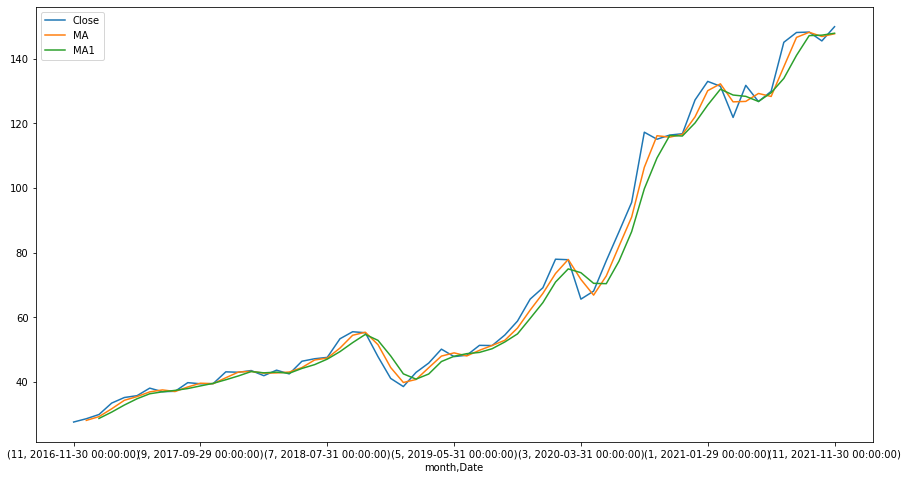

In [43]:
ap_mon_re.iloc[:, [3, 7, 8]].plot(figsize=(15, 8))

- 달별 인덱스

In [55]:
ap_mon_re = ap_mon_re.reset_index()

In [56]:
ap_mon_re

,month,Date,Open,High,Low,Close,Adj Close,Volume,rtn,MA,MA1
0,11,2016-11-30,27.476666,27.731250,27.286458,27.560833,25.871490,1.281196e+08,NaN,NaN,NaN
1,12,2016-12-30,28.498928,28.756309,28.386309,28.583929,26.831873,1.159565e+08,0.037121,28.072381,NaN
2,1,2017-01-31,29.773375,29.970250,29.696375,29.892500,28.060237,1.126244e+08,0.045780,29.238214,28.679087
3,2,2017-02-28,33.308684,33.540395,33.209210,33.428552,31.473814,1.210460e+08,0.118292,31.660526,30.634994
4,3,2017-03-31,35.090544,35.299456,34.927283,35.154457,33.142733,9.767450e+07,0.051630,34.291504,32.825170
...,...,...,...,...,...,...,...,...,...,...,...
56,7,2021-07-30,144.570478,146.252383,143.538571,145.139524,144.315018,9.138262e+07,0.116813,137.549080,133.960720
57,8,2021-08-31,147.850909,149.225909,146.865454,148.177727,147.516971,6.643376e+07,0.020933,146.658626,141.091963
58,9,2021-09-30,149.001905,149.995239,147.220475,148.306190,147.684631,8.561120e+07,0.000867,148.241959,147.207814
59,10,2021-10-29,144.971428,146.418570,143.954761,145.563809,144.953748,7.452758e+07,-0.018491,146.934999,147.349242


In [57]:
ap_mon_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      61 non-null     int64         
 1   Date       61 non-null     datetime64[ns]
 2   Open       61 non-null     float64       
 3   High       61 non-null     float64       
 4   Low        61 non-null     float64       
 5   Close      61 non-null     float64       
 6   Adj Close  61 non-null     float64       
 7   Volume     61 non-null     float64       
 8   rtn        60 non-null     float64       
 9   MA         60 non-null     float64       
 10  MA1        59 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 5.4 KB


In [58]:
ap_mon_re = ap_mon_re.set_index('month')
ap_mon_re

,Date,Open,High,Low,Close,Adj Close,Volume,rtn,MA,MA1
month,,,,,,,,,,
11,2016-11-30,27.476666,27.731250,27.286458,27.560833,25.871490,1.281196e+08,NaN,NaN,NaN
12,2016-12-30,28.498928,28.756309,28.386309,28.583929,26.831873,1.159565e+08,0.037121,28.072381,NaN
1,2017-01-31,29.773375,29.970250,29.696375,29.892500,28.060237,1.126244e+08,0.045780,29.238214,28.679087
2,2017-02-28,33.308684,33.540395,33.209210,33.428552,31.473814,1.210460e+08,0.118292,31.660526,30.634994
3,2017-03-31,35.090544,35.299456,34.927283,35.154457,33.142733,9.767450e+07,0.051630,34.291504,32.825170
...,...,...,...,...,...,...,...,...,...,...
7,2021-07-30,144.570478,146.252383,143.538571,145.139524,144.315018,9.138262e+07,0.116813,137.549080,133.960720
8,2021-08-31,147.850909,149.225909,146.865454,148.177727,147.516971,6.643376e+07,0.020933,146.658626,141.091963
9,2021-09-30,149.001905,149.995239,147.220475,148.306190,147.684631,8.561120e+07,0.000867,148.241959,147.207814


<AxesSubplot:xlabel='month'>

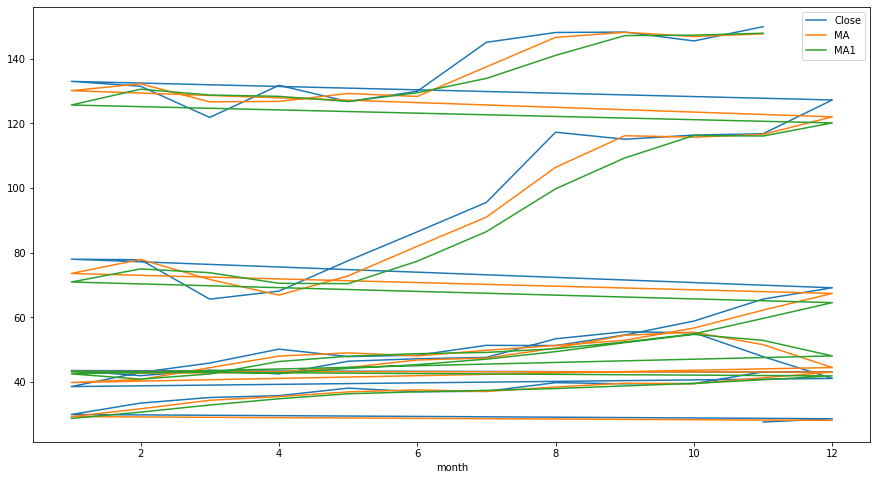

In [59]:
ap_mon_re.iloc[:, [4, 8, 9]].plot(figsize=(15, 8))

---

In [53]:
last_close = ap_mon['MA'].iloc[-2]
last_close

146.93499940476187

In [54]:
price = ap_mon['Close'].iloc[-1]
price

149.974002

---

- ARIMA 모델

In [85]:
#!pip install statmodels
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [65]:
model = ARIMA(ap_mon['Close'].values, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -187.916
Date:                Fri, 13 Jan 2023   AIC                            381.832
Time:                        15:32:47   BIC                            388.115
Sample:                             0   HQIC                           384.290
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2577      0.436      0.591      0.554      -0.596       1.112
ma.L1         -0.0115      0.469     -0.025      0.980      -0.931       0.908
sigma2        30.7211      4.293      7.156      0.000      22.307      39.135
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                10.15
Prob(Q):                              0.55   Prob(JB):                         0.01
Heteroskedasticity (H):              18.52   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

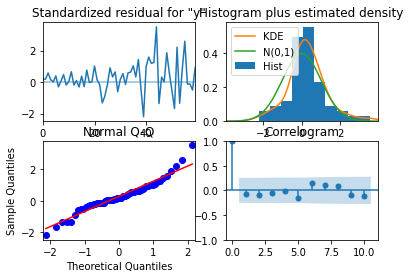

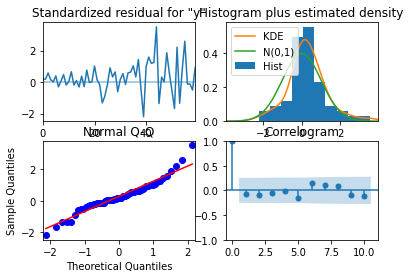

In [68]:
model_fit.plot_diagnostics()

In [70]:
from statsmodels.graphics.tsaplots import plot_predict

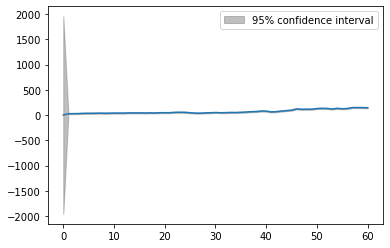

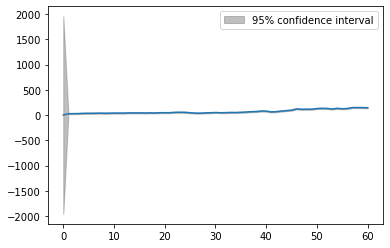

In [71]:
plot_predict(model_fit)

- 시각화 다른 예시

In [73]:
dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
dta

,SUNACTIVITY
0,5.0
1,11.0
2,16.0
3,23.0
4,36.0
...,...
304,40.4
305,29.8
306,15.2
307,7.5


In [77]:
dta.index = pd.date_range(start='1700', end='2009', freq='A')

In [84]:
res = sm.tsa.ARMA(dta, (3, 0)).fit()

/Users/oiehhun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


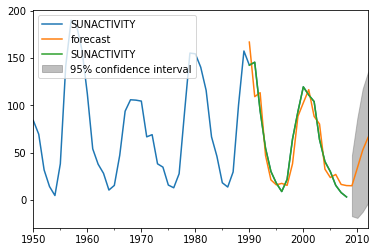

In [86]:
fig, ax = plt.subplots()
ax= dta.loc['1950':].plot(ax=ax)
fig = res.plot_predict('1990', '2012', ax=ax)
plt.show()